Importing Dependencies

In [12]:
import joblib
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import(
    StratifiedKFold,
    cross_validate
)
from sklearn.metrics import confusion_matrix
warnings.filterwarnings("ignore")

Load The Data

In [2]:
X_train = np.load('../artifacts/X_train.npz')['arr_0']
Y_train = np.load('../artifacts/Y_train.npz')['arr_0']
X_test = np.load('../artifacts/X_test.npz')['arr_0']
Y_test = np.load('../artifacts/Y_test.npz')['arr_0']

In [3]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier()
    
}

In [4]:
cv = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=42
)

In [13]:
trained_best_models = {}

for model_name, model in models.items():
    print(f"Cross-validating {model_name}...")
    
    cv_results = cross_validate(
        model, 
        X_train, 
        Y_train,
        cv=cv,
        scoring = 'f1',
        return_estimator=True,
        return_train_score=True
    )

    test_scores = cv_results['test_score']
    best_index = np.argmax(test_scores)
    
    estimator = cv_results['estimator'][best_index]
    print(estimator)
    trained_best_models[model_name] = estimator


Cross-validating Logistic Regression...
LogisticRegression()
Cross-validating Random Forest...
RandomForestClassifier()
Cross-validating Decision Tree...
DecisionTreeClassifier()


In [14]:
trained_best_models

{'Logistic Regression': LogisticRegression(),
 'Random Forest': RandomForestClassifier(),
 'Decision Tree': DecisionTreeClassifier()}

In [18]:
Y_hat_tests = {}
for model_name, model in trained_best_models.items():
    Y_hat_test = model.predict(X_test)
    Y_hat_tests[model_name] = Y_hat_test

Y_hat_tests

{'Logistic Regression': array([1, 0, 0, ..., 1, 0, 0], shape=(2000,)),
 'Random Forest': array([0, 0, 0, ..., 1, 0, 1], shape=(2000,)),
 'Decision Tree': array([0, 0, 0, ..., 0, 0, 0], shape=(2000,))}

In [24]:
cm1 = confusion_matrix(Y_test, Y_hat_tests['Logistic Regression'])
cm2 = confusion_matrix(Y_test, Y_hat_tests['Decision Tree'])
cm3 = confusion_matrix(Y_test, Y_hat_tests['Random Forest'])

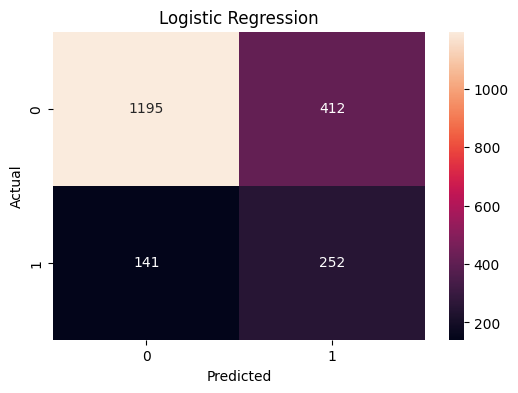

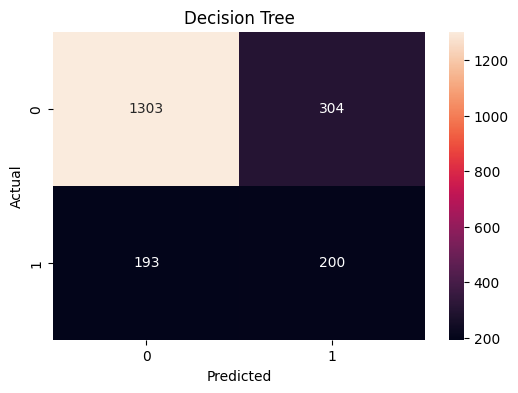

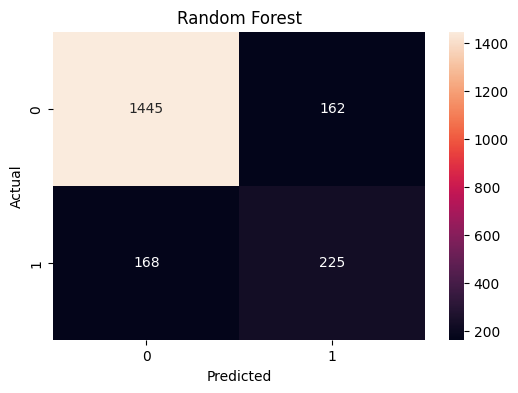

In [25]:
for model_name, cm  in {'Logistic Regression': cm1, 'Decision Tree': cm2, 'Random Forest': cm3}.items():
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(model_name)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    plt.show()